<a href="https://colab.research.google.com/github/sushantkumar-estech/Prediction-of-sales-revenue-using-mini-ANN/blob/master/Mini_ANN_to_predict_sales_revenue_with_Tensorflow_2_0_Python_with_Google%C2%A0Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [3]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## STEP #1: Import *Dataset*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
sales_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Revenue Prediction/SalesData.csv')

In [9]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [10]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [11]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## STEP #2: Visualization of Dataset

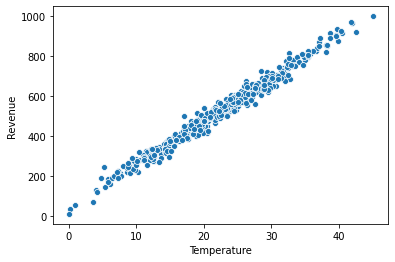

In [13]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

## STEP #3: Creating Training & Testing Dataset

In [14]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

## STEP #4: Build & Train the Model

In [15]:
X_train.shape

(500,)

In [16]:
y_train.shape

(500,)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1, input_shape = [1]))
#model.add(tf.keras.layers.Dense(units=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [20]:
epochs_hist = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 11s 27ms/sample - loss: 312605.4725 - val_loss: 336566.4600
Epoch 2/100
400/400 [==============================] - 0s 91us/sample - loss: 279196.2875 - val_loss: 299432.9325
Epoch 3/100
400/400 [==============================] - 0s 66us/sample - loss: 247784.0687 - val_loss: 265489.6113
Epoch 4/100
400/400 [==============================] - 0s 78us/sample - loss: 218967.4238 - val_loss: 234333.8981
Epoch 5/100
400/400 [==============================] - 0s 81us/sample - loss: 192833.8987 - val_loss: 206149.1000
Epoch 6/100
400/400 [==============================] - 0s 68us/sample - loss: 169015.9606 - val_loss: 180479.2575
Epoch 7/100
400/400 [==============================] - 0s 76us/sample - loss: 147669.7769 - val_loss: 157348.6925
Epoch 8/100
400/400 [==============================] - 0s 77us/sample - loss: 128336.0562 - val_loss: 136635.3056
Epoch 9/100
400/400 [====================

## STEP #5: Evaluating the Model

In [21]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

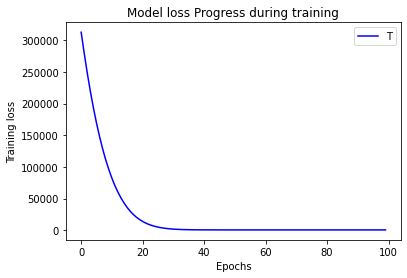

In [22]:
plt.plot(epochs_hist.history['loss'], color='blue')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss / Validation Loss')

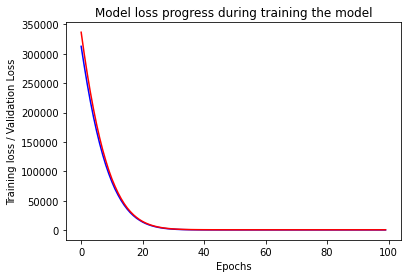

In [23]:
plt.plot(epochs_hist.history['loss'], color='blue', label='Training loss')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss')

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss / Validation Loss')

In [24]:
model.get_weights()

[array([[22.191706]], dtype=float32), array([25.261503], dtype=float32)]

In [25]:
# Use the same model to perform predictions
Temperature = 5
Revenue = model.predict([Temperature])
print('Revenue Prediction using trained ANN=', Revenue)

Revenue Prediction using trained ANN= [[136.22003]]


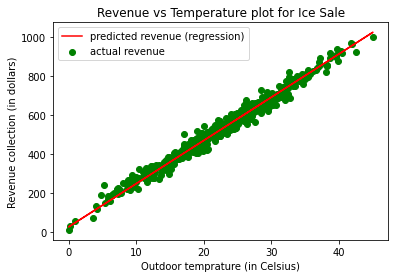

In [26]:
plt.scatter(X_train, y_train, color = 'g', label = 'actual revenue')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'predicted revenue (regression)')
plt.ylabel("Revenue collection (in dollars)")
plt.xlabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()

## STEP #6 (Optional): Confirming the model using Regression Kit in Scikit learn! 

In [27]:
# making dataset in batch

X_train = X_train.values.reshape(-1,1)

In [28]:
X_train.shape

(500, 1)

In [29]:
y_train = y_train.values.reshape(-1,1)

In [30]:
y_train.shape

(500, 1)

In [31]:
from sklearn.linear_model import  LinearRegression

In [32]:
regressor = LinearRegression(fit_intercept= True) # asking LinearRegression to return the slope along with the Y-intercept
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_) 

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


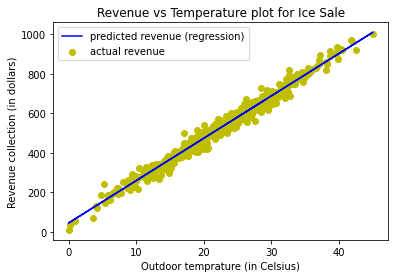

In [34]:
plt.scatter(X_train, y_train, color = 'y', label = 'actual revenue')
plt.plot(X_train, regressor.predict(X_train), color = 'b', label = 'predicted revenue (regression)')
plt.ylabel("Revenue collection (in dollars)")
plt.xlabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()

In [35]:
# Use the same model to perform predictions
Temperature = [5]
Revenue = regressor.predict([Temperature])
print('Revenue Prediction using regressor model=', Revenue)

Revenue Prediction using regressor model= [[152.04939464]]
